In [4]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create


# Read in the data

df = pd.read_csv(r'literacy_rate_vaccine_hesitancy.csv')

In [20]:
# Looking at the data

df.head()

,State,literacyRate,hesitant,unsure,strongly_hesitant
0,ALABAMA,0.852,0.173507,0.231512,0.132409
1,ALASKA,0.908,0.217386,0.264245,0.156907
2,ARIZONA,0.869,0.159240,0.242547,0.121353
3,ARKANSAS,0.863,0.212123,0.261232,0.139901
4,CALIFORNIA,0.769,0.072274,0.111041,0.035807


In [21]:
# Looking for any missing data

for col in df.columns:
    prcnt_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,prcnt_missing))

State - 0.0%
literacyRate - 0.0%
hesitant - 0.0%
unsure - 0.0%
strongly_hesitant - 0.0%


In [23]:
# Data types for columns

df.dtypes

# I am interested in the estimated hesitant columns, but as they are represented by float values <1, it wouldn't be ideal
# to convert them to integers as they would all be 0

State                 object
literacyRate         float64
hesitant             float64
unsure               float64
strongly_hesitant    float64
dtype: object

In [25]:
# Sort the data by lowest literacy rate

df.sort_values(by=['literacyRate'], inplace=False, ascending=True)

,State,literacyRate,hesitant,unsure,strongly_hesitant
4,CALIFORNIA,0.769,0.072274,0.111041,0.035807
31,NEW YORK,0.779,0.071785,0.134406,0.050453
8,FLORIDA,0.803,0.145212,0.202140,0.097207
42,TEXAS,0.810,0.119811,0.181991,0.080033
29,NEW JERSEY,0.831,0.049695,0.108705,0.033714
9,GEORGIA,0.833,0.161815,0.237219,0.103119
30,NEW MEXICO,0.835,0.078224,0.139124,0.041700
27,NEVADA,0.839,0.132424,0.212188,0.071524
23,MISSISSIPPI,0.840,0.182532,0.290695,0.125424
17,LOUISIANA,0.840,0.189719,0.267039,0.116995


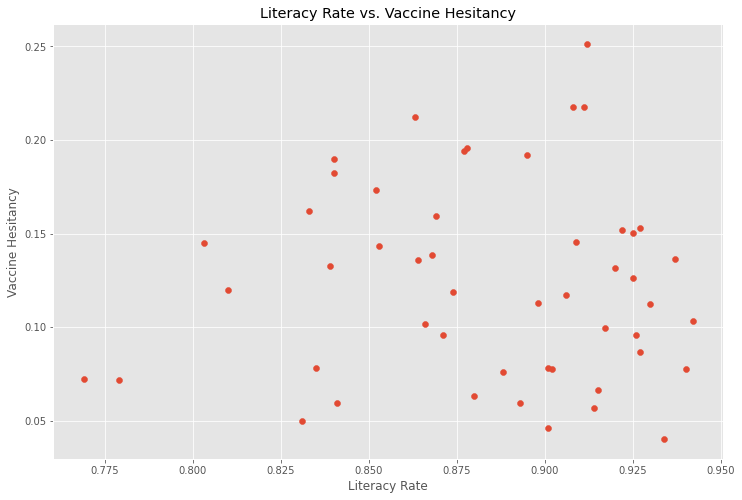

In [6]:
# Does having a lower literacy rate correlate to being more vaccine hesitant?
# Build a scatter plot with literacy rate vs. hesitant

plt.scatter(x=df['literacyRate'], y=df['hesitant'])
plt.title('Literacy Rate vs. Vaccine Hesitancy')
plt.xlabel('Literacy Rate')
plt.ylabel('Vaccine Hesitancy')
plt.show()

<AxesSubplot:xlabel='literacyRate', ylabel='hesitant'>

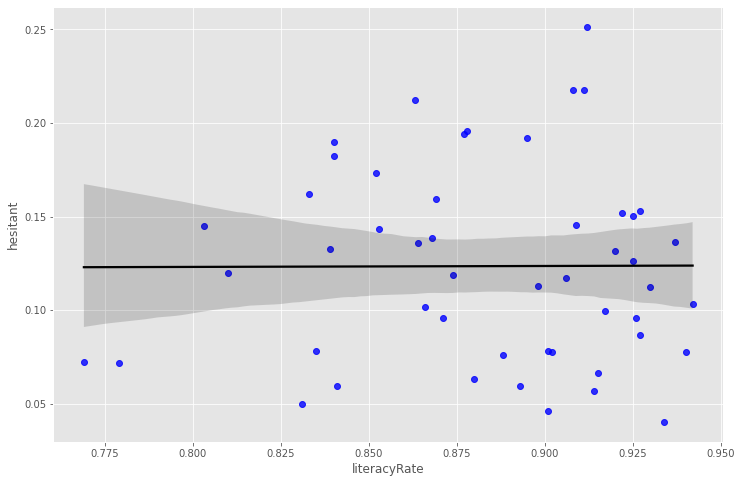

In [11]:
# Plot literacy rate vs. hesitancy using seaborn

sns.regplot(x='literacyRate', y='hesitant', data=df, scatter_kws={"color": "blue"}, line_kws={"color":"black"})

In [15]:
# Let's create a correlation chart

df.corr(method='pearson')

,literacyRate,hesitant,unsure,strongly_hesitant
literacyRate,1.000000,0.004058,-0.105898,0.017322
hesitant,0.004058,1.000000,0.967027,0.976138
unsure,-0.105898,0.967027,1.000000,0.935990
strongly_hesitant,0.017322,0.976138,0.935990,1.000000


Text(0.5, 1.0, 'Correlation Matrix for levels of vaccine hesitancy vs. literacy rate')

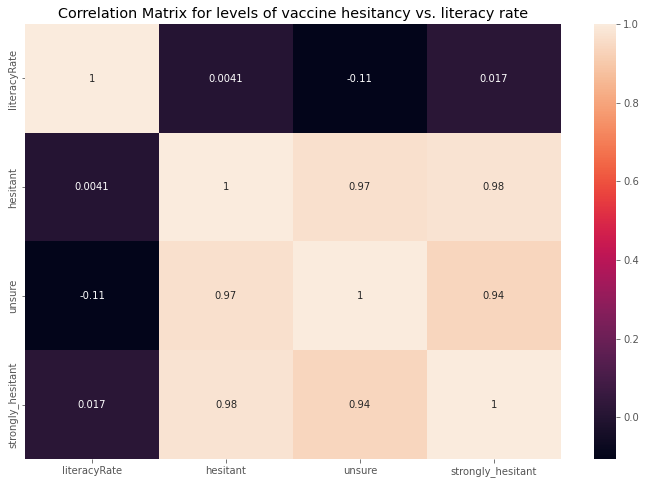

In [17]:
# There does not seem to be any strong correlation
# Interestingly enough there's a slightly negative correlation between those 'unsure' about the vaccine
# vs. the literacy rate

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix,annot=True)

plt.title('Correlation Matrix for levels of Vaccine Hesitancy vs. Literacy Rate')

<AxesSubplot:xlabel='literacyRate', ylabel='unsure'>

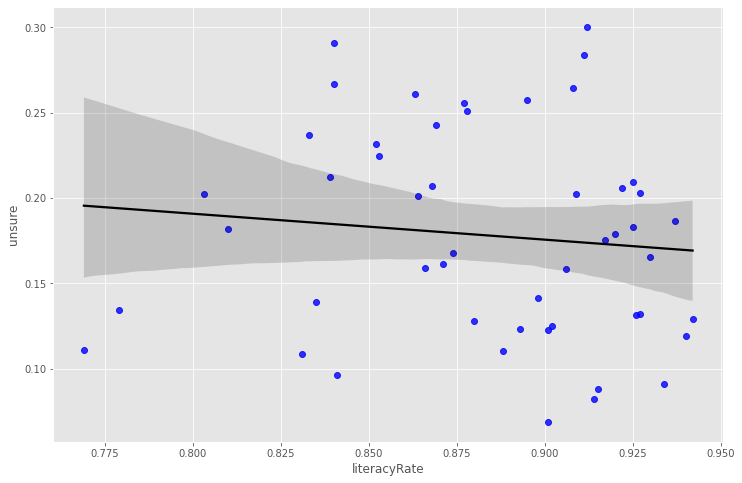

In [18]:
# Even without creating a scatterplot, you can easily tell from the matrix that there is no
# correlation between any level of vaccine hesitancy vs. literacy rate. But let's create
# the plots for visual purposes

# Hesitancy level 'unsure' vs. literacy rate

sns.regplot(x='literacyRate', y='unsure', data=df, scatter_kws={"color": "blue"}, line_kws={"color":"black"})

In [ ]:
# Hesitancy level strongly hesitant vs. literacy rate

sns.regplot(x='literacyRate', y='unsure', data=df, scatter_kws={"color": "blue"}, line_kws={"color":"black"})